if you have questions on this assignment, please send me (Achille Mascia) an email achille.mascia@columbia.edu or come see me during my office hours.

<h1>Problem 1: Factorials using numpy</h1>
<li><b>prod</b> A numpy function that returns the product of all elements in an array
<li><b>cumprod</b> A numpy function on an ndarray of size n that returns an array of size n where each element i is the product of all elements from 0 to i


In [1]:
"""
Replace pass with the code that uses ndarray, prod and cumprod 
to calculate the factorial of n

The function should take an integer as an argument and return an integer

"""
def factorial(n):
    import numpy as np
    ax = np.arange(n+1)
    res = np.prod(ax[1:])
    return(res)

factorial(3)

6

In [2]:
"""
Replace pass with the code that uses ndarray, prod and cumprod to 
calculate the factorials of all values from 1 to n

The function should take an integer as an argument and return an ndarray
of size n 

"""

def all_factorials(n):
    import numpy as np
    ax = np.arange(n+1)
    res = np.cumprod(ax[1:])
    return(res)

all_factorials(4)

array([ 1,  2,  6, 24])

<h1>Problem 2: Percent changes</h1>
Write a function that constructs an ndarray from data in a file and 
returns a 1-period percent change on an ndarray after removing any nan values. Your function must make use of the following functions:
<li>np.genfromtxt: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html
<li>np.diff: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.diff.html
<li>np.isnan: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isnan.html

<p>Test your function out using the attached apple.csv file. Your function can assume that the file structure is (date,price)

<p>Note that percent change is defined as (p(t)-p(t-1))/p(t-1)

<b>Example:</b><br>
If the data array is: np.array([1,2,np.NaN,4,8,np.NAN])
<br>
The output array should be<br>
array([ 1.,  1.,  1.])


In [5]:
def get_pct_changes(file_name):
    import numpy as np
    with open(file_name,'r') as f:
        ax = np.genfromtxt(file_name, delimiter=",")
        ax = ax [:,1][1:]
        num = list()
        for i in range(len(ax)):
            if np.isnan(ax)[i] == False:
                num.append(ax[i])
        numx = np.array(num)
        diffx = np.diff(numx)
        res = np.array(list(diffx[i] * 100 / num[i] for i in range(len(diffx))))
        return res
        
get_pct_changes("aapl.csv")

array([-0.07859585,  0.97717383, -1.39623566, ...,  0.35119271,
        0.67333657,  0.88885156])

<h1>Problem 3: Pandas Grouping</h1>
Write a program that reads timeseries pricing data from a file into a pandas dataframe and then groups the data as follows:
<li>Adds a column, one-day percent change to the file 
<li>Groups the data into four categories:
<ul>
<li>"High+" if the percent change is greater than 2.5%
<li>"Low+" if the percent change is positive and less than or equal to 2.5% 
<li>"Low-" if the percent change is negative but greater than or equal to -2.5%
<li>"High-" if the percent change is less than -2.5%
</ul>
<li>Report the size and the mean of each of the groups



In [6]:
datafile = "aapl.csv"
import pandas as pd
df = pd.read_csv('aapl.csv',na_values='null')
nan_row = 0
for i in df.index:
    if np.isnan(df.iloc[i]['price']):
        nan_row = i

dat = get_pct_changes(datafile)
inte = np.insert(dat, 0, 0)
if nan_row == 0 and np.isnan(df.iloc[i]['price']) == False:
    fin = inte
else:
    fin = np.insert(inte, nan_row, 0)
df['1-day % Change'] = fin

def GroupColFunc(df, ind, col):
    if df[col].loc[ind] > 2.5:
        return 'High+'
    elif df[col].loc[ind] >= 0 and df[col].loc[ind] <= 2.5:
        return 'Low+'
    elif df[col].loc[ind] <= 0 and df[col].loc[ind] >= -2.5:
        return 'Low-'
    elif df[col].loc[ind] < -2.5:
        return 'High-'

grouped = df.groupby(lambda x: GroupColFunc(df, x, '1-day % Change'))
print(grouped.size())

High+     51
High-     44
Low+     617
Low-     547
dtype: int64


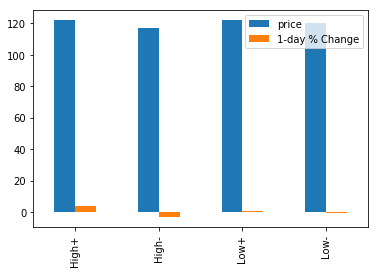

In [7]:
%matplotlib inline
grouped.mean().plot(kind='bar')

In [8]:
grouped.mean()

,price,1-day % Change
High+,122.229482,3.701255
High-,116.783865,-3.475157
Low+,122.118766,0.835801
Low-,120.175849,-0.748819
